In [143]:
import numpy as np
import matplotlib.pyplot as plt


Predicted $\vec{Y_{hat}} = \vec{W}.X_{Train}$

Error=$\frac{(\vec{Y_{hat}}-Y)^2}{2*N}$


In [144]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

path='/content/drive/My Drive/ColabNotebooks/Gradient_Descent/'


df = open(path+'x_train3.txt', "r")
lines = df.readlines()
df.close()

# remove /n at the end of each line
for index, line in enumerate(lines):
      lines[index] = line.strip()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [145]:
lines
q=[]
for item in lines:
     p=item.lstrip()
     p1=p.rstrip()
     q.append(p1)
q
lines=q
#remove space 

In [146]:
import re
df_result = pd.DataFrame(columns=('first_col', 'second_col'))
df_result
i = 0  
first_col = "" 
second_col = ""  
for line in lines:
    #you can use "if" and "replace" in case you had some conditions to manipulate the txt data
    if 'X' in line:
        first_col = line.replace('X', "")
    else:
        #you have to kind of define what are the values in columns,for example second column includes:
        second_col = re.sub(r' \(.*',"", line)
        #this is how you create next line data
        df_result.loc[i] = [first_col, second_col]
        i =i+1
## Reference to code block from stack overflow
#https://stackoverflow.com/questions/32120949/converting-text-files-to-pandas-dataframe#


In [147]:
df=df_result['second_col'].str.split(" ",expand = True)

In [148]:
x_train=df.iloc[:,[0,3]]
x_train[0]=pd.to_numeric(x_train[0])
x_train[3]=pd.to_numeric(x_train[3])

<ipython-input-148-38e386c95b1b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[0]=pd.to_numeric(x_train[0])
<ipython-input-148-38e386c95b1b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[3]=pd.to_numeric(x_train[3])


In [8]:
x_train.columns

Int64Index([0, 3], dtype='int64')

In [149]:
x_train.shape

(47, 2)

In [150]:
constant=np.repeat(1,repeats=x_train.shape[0])
constant

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

In [151]:
x_train_new=np.c_[constant,x_train]
x_train_new

array([[1.000e+00, 2.104e+03, 3.000e+00],
       [1.000e+00, 1.600e+03, 3.000e+00],
       [1.000e+00, 2.400e+03, 3.000e+00],
       [1.000e+00, 1.416e+03, 2.000e+00],
       [1.000e+00, 3.000e+03, 4.000e+00],
       [1.000e+00, 1.985e+03, 4.000e+00],
       [1.000e+00, 1.534e+03, 3.000e+00],
       [1.000e+00, 1.427e+03, 3.000e+00],
       [1.000e+00, 1.380e+03, 3.000e+00],
       [1.000e+00, 1.494e+03, 3.000e+00],
       [1.000e+00, 1.940e+03, 4.000e+00],
       [1.000e+00, 2.000e+03, 3.000e+00],
       [1.000e+00, 1.890e+03, 3.000e+00],
       [1.000e+00, 4.478e+03, 5.000e+00],
       [1.000e+00, 1.268e+03, 3.000e+00],
       [1.000e+00, 2.300e+03, 4.000e+00],
       [1.000e+00, 1.320e+03, 2.000e+00],
       [1.000e+00, 1.236e+03, 3.000e+00],
       [1.000e+00, 2.609e+03, 4.000e+00],
       [1.000e+00, 3.031e+03, 4.000e+00],
       [1.000e+00, 1.767e+03, 3.000e+00],
       [1.000e+00, 1.888e+03, 2.000e+00],
       [1.000e+00, 1.604e+03, 3.000e+00],
       [1.000e+00, 1.962e+03, 4.00

In [152]:
y_train=pd.read_csv(path +'y_train.csv')
y_train

,y
0,400000.0
1,330000.0
2,369000.0
3,232000.0
4,540000.0
5,300000.0
6,315000.0
7,199000.0
8,212000.0
9,243000.0


In [13]:
# equation is as per Linear Regression Analytic Process :


$\beta$=$(X^T.X)^{-1}(X^T.Y)$

Steps:
1. Calculate Prod1=$(X^T.X)$

2. Calculate Prod2=Inverse of Prod1

3. Calculate $(X^T.Y)$ as Prod3 

4. Multiply Prod2. Prod3

In [153]:

X=x_train_new
X_t=X.T
prod1=np.dot(X_t,X)
prod2=np.linalg.inv(prod1)
y=y_train.values
prod2
prod2.shape
#np.dot(prod2,np.dot(X_t,y2))

(3, 3)

Looking at product of X_T,Y

In [154]:
y2=y.reshape(-1,1)
y2
y2.shape

(47, 1)

In [155]:
prod_3=np.matmul(X_t,y2)

Answer using Linear Regression 

In [156]:
beta_vector=np.dot(prod2,prod_3)
beta_vector

array([[89805.53774389],
       [  139.17782523],
       [-8751.87608341]])

#Loss
Error=$\frac{(\vec{Y_{hat}}-Y)^2}{2*N}$

Eroor =J(W)=$\frac{(X.Θ-X).(X.Θ-X)^T}{2*N}$

In [157]:
def cost(X, Y, w):
    J=np.dot((np.dot(X,w) - Y).T,(np.dot(X,w) - Y))/(2*len(Y))
    return J

In [158]:
import numpy as np
from sklearn.linear_model import LinearRegression
model=LinearRegression()
fit2=model.fit(x_train,y2)#use x_train as the intercept is automatically treated in linear regression model
print(f"slope:{fit2.coef_}")
print(f"intercept:{fit2.intercept_}")



slope:[[  139.17782523 -8751.87608341]]
intercept:[89805.53774389]


In [169]:
# Answer is same as Linear Regression as compared to Analytical Solution

# ANSWER CASE A WHEN WE HAVE TRAINING DATA THAT INCLUDES NUMBER OF ROOMS AND AREA TO PREDICT PRICE#

# Here we do 2 ways- normalizing entire X and Y Data
# Option 2 Normalize X only using standard Scaler and keeping Y Original

**GRADIENT DESCENT PROCESS **

$∇J(\vec{w})=(X^T.X.\vec{w}-X^T.\vec{Y})$

$X -Train Data including constant Term 1  $

$Y -Y train Data $

$w -initial weight$

# We need to move the weight in direction such that loss function is 0

$\vec{w_{n+1}}=\vec{w_{n}}-η*∇J(\vec{w_{n}})$ 

which is updating weight in direction where loss function tends towards threshold

 Normalizing X and Y both 

In [163]:
from matplotlib.collections import EllipseCollection
def cost(X, Y, w):
    J=np.dot((Y-(np.dot(X,w))).T,(Y-np.dot(X,w)))/(2*len(Y))
    return J
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
alpha = 0.0001 # Specify the learning rate
X = x_train_new
X_s=ss.fit_transform(X)
print(X_s.shape)
Y = y2
print(Y.shape)
Y_s=ss.fit_transform(Y)
num_iters = 1000
cost_history=[]
w_history=[]
w=np.array([0,0,0]).T
w=w.reshape(-1,1)
print(w.shape)
print(w.shape)
print(X.shape)
print(Y.shape)
tolerance=0.01
eta=0.001
cost_up=cost(X_s,Y_s,w)
for i in range(num_iters):# for loop is easier that until and hence using for loop 
  grad=np.dot(np.dot(X_s.T,X_s),w)-np.dot(X_s.T,Y_s)# computing gradient for each iteration 
  w=np.subtract(w,(eta*grad))# readjusting the weight in direction of negative gradient 
  cost_up=cost(X_s,Y_s,w)[0][0]#New error after new weights
  cost_history.append(cost_up)# create history of error 
  w_history.append(w)# create history of theta 
  if np.linalg.norm(grad)< tolerance:# we need to break if absolute gradient is tending towards zero
    r=i
    break
  else:
    continue



(47, 3)
(47, 1)
(3, 1)
(3, 1)
(47, 3)
(47, 1)


In [164]:
cost_history

[0.4579640631695164,
 0.42146877952476036,
 0.38974773673894475,
 0.3621421209803837,
 0.33808554466672963,
 0.3170910163547978,
 0.2987397502107546,
 0.2826715552429298,
 0.2685765811799104,
 0.2561882293927111,
 0.24527706432400007,
 0.2356455841284978,
 0.22712372918679244,
 0.21956502429368693,
 0.2128432650400763,
 0.20684967154621553,
 0.2014904435577771,
 0.19668466023650352,
 0.1923624759811063,
 0.1884635704873145,
 0.18493581715836066,
 0.1817341390458373,
 0.17881952585353628,
 0.17615818927475008,
 0.17372083714339334,
 0.17148204963579222,
 0.16941974312713162,
 0.16751470933933651,
 0.1657502191628325,
 0.1641116820337361,
 0.16258635303539187,
 0.16116308099872004,
 0.15983209182523586,
 0.15858480207191847,
 0.1574136585372726,
 0.15631200018921332,
 0.155273939291775,
 0.15429425903109562,
 0.15336832532195774,
 0.15249201080322228,
 0.15166162931136573,
 0.15087387936254656,
 0.15012579538079043,
 0.14941470558779557,
 0.14873819562266077,
 0.14809407709106917,
 0.147

In [165]:
r

346

In [25]:
# final weights for normalized Gradient Descent Process
w

array([[ 0.        ],
       [ 0.88427592],
       [-0.05293379]])

Text(0.5, 1.0, 'Error Loss  Vs Iterations')

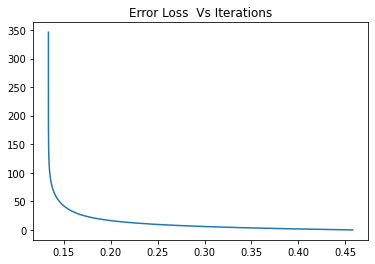

In [166]:
plt.plot(cost_history,range(r+1))
plt.title("Error Loss  Vs Iterations")

 Normalizing X_TRAIN ONLY AND KEEPING PRICE SAME

In [167]:
from matplotlib.collections import EllipseCollection
def cost(X, Y, w):
    J=np.dot((Y-(np.dot(X,w))).T,(Y-np.dot(X,w)))/(2*len(Y))
    return J
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = x_train_new
X_s=ss.fit_transform(X)
print(X_s.shape)
Y = y2
print(Y.shape)
num_iters = 1000
cost_history=[]
w_history=[]
w=np.array([0,0,0]).T
w=w.reshape(-1,1)
print(w.shape)
print(w.shape)
print(X.shape)
print(Y.shape)
tolerance=0.01
eta=0.001
cost_up=cost(X_s,Y,w)
for i in range(num_iters):# for loop is easier that until and hence using for loop 
  grad=np.dot(np.dot(X_s.T,X_s),w)-np.dot(X_s.T,Y)# computing gradient for each iteration 
  w=np.subtract(w,(eta*grad))# readjusting the weight in direction of negative gradient 
  cost_up=cost(X_s,Y_s,w)[0][0]#New error after new weights
  cost_history.append(cost_up)# create history of error 
  w_history.append(w)# create history of theta 
  if np.linalg.norm(grad)< tolerance:# we need to break if absolute gradient is tending towards zero
    r=i
    break
  else:
    continue



(47, 3)
(47, 1)
(3, 1)
(3, 1)
(47, 3)
(47, 1)


In [168]:
w

array([[     0.        ],
       [109421.97033747],
       [ -6588.78664222]])

# How weights alter the path of Error Cost?

In [26]:
from pandas.core.window.ewm import window_aggregations
def Extract(list):
    p=[item[1] for item in list]
    q=[item[2] for item in list]
    return p,q
m,n=Extract(w_history)
m = [arr.tolist() for arr in m]
n=[arr.tolist() for arr in n]
flat_list = [item for sublist in m for item in sublist]
flat_list2= [item for sublist in n for item in sublist]

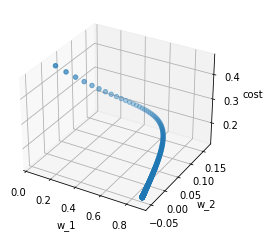

In [27]:
w_1=flat_list
w_2=flat_list2
cost=cost_history
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
ax.scatter3D(w_1, w_2, cost, 'gray')
ax.set_xlabel('w_1')
ax.set_ylabel('w_2')
ax.set_zlabel('cost');

In [28]:
## PART 2


## PART 2- USING ONE REGRESSOR-SIZE /AREA

In [69]:
#ONLY LIVING AREA

from matplotlib.collections import EllipseCollection
w=np.array([0,0]).T
w=w.reshape(-1,1)
X=np.array([])
Y=np.array([])
def cost(X, Y, w):
    J=np.dot((Y-(np.dot(X,w))).T,(Y-np.dot(X,w)))/(2*len(Y))
    return J
def gradient_Descent(X,Y,iter):
 r=0
 X = X
 Y = Y
 cost_history=[]
 w_history=[]
 w=np.array([0,0]).T
 w=w.reshape(-1,1)
 tolerance=0.001# Tolerance 
 eta=0.001# Learning Rate 
 cost_up=cost(X,Y,w)
 for i in range(iter):# for loop is easier that until and hence using for loop 
    p=np.dot(np.dot(X.T,X),w).reshape(-1,1)
    q=np.dot(X.T,Y)# computing gradient for each iteration 
    grad=np.subtract(p,q)
    w=np.subtract(w,(eta*grad))# readjusting the weight in direction of negative gradient 
    if (np.isnan(w).any()):
      break
    if (np.isinf(w).any()):
      break
    else:
     cost_up=cost(X,Y,w)[0][0]#New error after new weights
     cost_history.append(cost_up)# create history of error 
     w_history.append(w)# create history of theta 
     if np.linalg.norm(grad)< tolerance:# we need to break if absolute gradient is tending towards zero
      r=i
      break
     else:
      continue
 return cost_history,w,r #return the last weight 


In [30]:
print(type(x_train))
x_train2=x_train.iloc[:,0]#dataframe
x_train2.values
print(x_train2.shape)
y_train2=y_train.values.reshape(-1,1)
y_train2.shape
#a,b,c=gradient_Descent(x_train2,y_train2,iter=10000)

<class 'pandas.core.frame.DataFrame'>
(47,)


(47, 1)

In [72]:
p=x_train2.values
x_train3=p.reshape(-1,1)# reshaping to matrix of 47 rows and 1 column
constant=np.repeat(1,repeats=x_train.shape[0])
x_train4=np.c_[constant,x_train2]
x_train4.shape# adding constant 
x_train4
x_mean=np.mean(x_train4[:],axis=0)
var=np.var(x_train4,axis=0)
x_mean
var

array([     0.        , 618114.55771842])

In [70]:

def Normalization(df):
 df[:,1] = df[:,1].apply(lambda x: (x-x.mean())/ x.std(), axis=0)
 return df

In [71]:
mean_2=x_train4[:,1].mean()
sd_2=x_train4[:,1].std()
sd_2
mean_2

2000.6808510638298

In [34]:
check=cost(x_train4,y_train2,w)[0][0]

In [35]:
a,b,c=gradient_Descent(X=x_train4,Y=y_train2,iter=5)
print(b)
y_train2[0]*0.00005

[[3.38156429e+10]
 [7.81017209e+13]]


array([20.])

In [73]:
print(x_train4.shape)

grad=np.dot(np.dot(x_train4.T,x_train4),w)-np.dot(x_train4.T,y_train2)
x_train4
w=np.array([1,.01]).T
w2=w.reshape(-1,1)
print(w2.shape)
a=(np.dot(np.dot(x_train4.T,x_train4),w)).reshape(-1,1)
print(a)
print(y_train2.shape)
b=(np.dot(x_train4.T,y_train2))
b


(47, 2)
(2, 1)
[[9.87320000e+02]
 [2.26582606e+06]]
(47, 1)


array([[1.6004000e+07],
       [3.5925872e+10]])

In [87]:
def normalization(x):
  x_mean=np.mean(x)
  xbar=np.repeat(x_mean,repeats=len(x))
  diff=np.subtract(x,xbar)
  xvar=np.std(x)
  normal_x=diff/xvar
  return normal_x,xbar,xvar

In [88]:
x2,xbar,v=normalization(x_train4[:,1])
constant=np.repeat(1,repeats=len(x_train4))
normalized_array=np.c_[constant,x2]
x_train_new=normalized_array
x_train_new.shape
y_train2.shape

(47, 1)

In [76]:
c_history,w,d=gradient_Descent(x_train_new,y_train2,iter=5000)

490


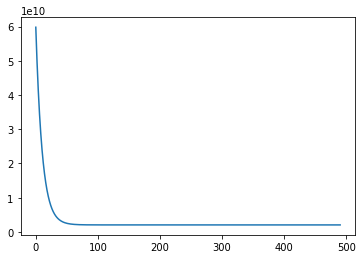

In [78]:
plt.plot(c_history)
print(d)# we reach iteration at 490 at given learning rate!!

In [104]:
w# Final Weight based on Gradient Descent Proces

array([[340510.63827939],
       [105732.46604223]])

In [122]:
#Test Data
x_test=1650
x_test2=(x_test-xbar[0])/v
x_test2
x_new_test=np.array([1,x_test2])
test=x_new_test.reshape(1,-1)

In [127]:
test.shape
y_pred=np.dot(test,w)
print(f"the price is {y_pred[0][0]}")

the price is 293349.3209639554


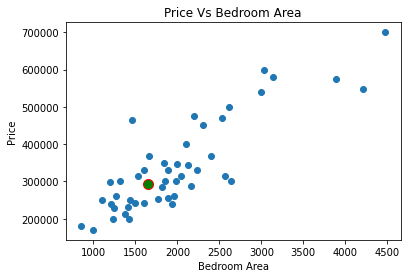

In [137]:
# plot the train data and test data 
plt.plot(x_train4[:,1],y2,'o')
plt.title("Price Vs Bedroom Area")
plt.xlabel("Bedroom Area")
plt.ylabel("Price")
plt.plot(x_test,y_pred[0][0],marker="o", markersize=10, markeredgecolor="red", markerfacecolor="green")